In [1]:
import torch
from torchvision.utils import save_image
import matplotlib.pyplot as plt
from utils import load_gray, to_rgb
from network import ColorizeNet

In [2]:
model = ColorizeNet()
model.load_state_dict(
    torch.load('models/model.pth', map_location='cpu')
)

<All keys matched successfully>

In [3]:
img_l = load_gray('goa.jpg', shape=720)
img_l.shape

torch.Size([1, 1, 720, 1280])

In [4]:
model.eval()
with torch.no_grad():
    img_ab = model(img_l)

img_ab.shape

torch.Size([1, 2, 720, 1280])

In [5]:
img_rgb = to_rgb(img_l, img_ab)
img_rgb.shape

(720, 1280, 3)

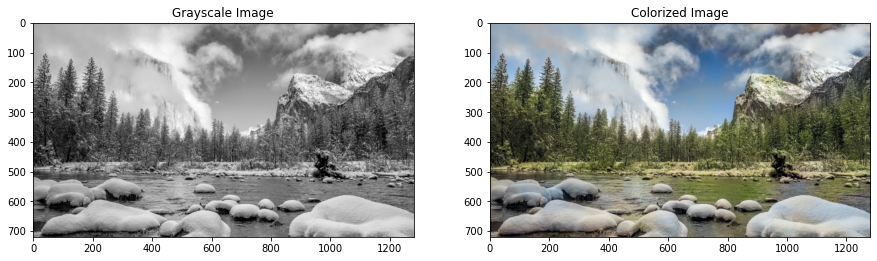

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.imshow(img_l[0, 0].numpy(), cmap='gray')
ax1.set_title('Grayscale Image')
ax2.imshow(img_rgb)
ax2.set_title('Colorized Image')
plt.show()
fig.tight_layout()
fig.savefig('images/colorized/goaa.png')
plt.close()